# Collaboration Patterns By Year (International, Domestic, Internal)

Using the count capability of the API, Dimensions allows you to quickly identify international, domestic, and inernal Collaboration

This notebook shows how to quickly identify international, domestic, and internal collaboration using the [Organizations data source](https://docs.dimensions.ai/dsl/datasource-organizations.html) and the [Publications data source](https://docs.dimensions.ai/dsl/datasource-publications.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 


In [1]:
import datetime
print("==\nCHANGELOG\nThis notebook was last run on %s\n==" % datetime.date.today().strftime('%b %d, %Y'))

==
CHANGELOG
This notebook was last run on Jan 25, 2022
==


## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the ['Getting Started' tutorial](https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html).

In [16]:
!pip install dimcli plotly -U --quiet 

#
# load libraries
import dimcli
from dimcli.utils import *

import json, sys, time
import pandas as pd
import plotly.express as px  # plotly>=4.8.1
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

Searching config file credentials for 'https://app.dimensions.ai' endpoint..


==
Logging in..
Dimcli - Dimensions API Client (v0.9.6)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.0
Method: dsl.ini file


## 1. Lookup the University that you are interested in

In [17]:
dsl.query("""
search organizations for "melbourne" return organizations
""").as_dataframe()

Returned Organizations: 16 (total = 16)
Time: 0.57s


,city_name,country_name,id,latitude,linkout,longitude,name,state_name,types,acronym
0,Melbourne,Australia,grid.511296.8,-37.797960,[https://www.melbournegenomics.org.au/],144.953870,Melbourne Genomics Health Alliance,Victoria,[Nonprofit],NaN
1,Barcelona,Spain,grid.493437.e,41.402576,[https://www.rmit.eu],2.194333,RMIT Europe,NaN,[Education],RMIT
2,Carlton,Australia,grid.490309.7,-37.803123,[https://www.mshc.org.au/],144.963840,Melbourne Sexual Health Centre,Victoria,[Healthcare],MSHC
3,Richmond,Australia,grid.477970.a,-37.815063,[http://www.themelbourneclinic.com.au/],144.999650,Melbourne Clinic,Victoria,[Healthcare],NaN
4,Melbourne,Australia,grid.469061.c,-37.783780,[https://www.ridley.edu.au/],144.957660,Ridley College,Victoria,[Education],NaN
5,Melbourne,Australia,grid.469026.f,-37.859700,[http://www.mst.edu.au/],145.209410,Melbourne School of Theology,Victoria,[Education],MBI
6,Melbourne,Australia,grid.468079.4,-37.824028,[http://www.portofmelbourne.com/],144.907070,Port of Melbourne Corporation,Victoria,[Government],PoMC
7,Melbourne,Australia,grid.468069.5,-37.814007,[http://www.melbournewater.com.au/Pages/home.a...,144.946700,Melbourne Water,Victoria,[Government],NaN
8,Melbourne,Australia,grid.452643.2,-37.799847,[https://www.vlsci.org.au/],144.964460,Victorian Life Sciences Computation Initiative,Victoria,[Education],NaN
9,Melbourne,Australia,grid.449135.e,NaN,NaN,NaN,Melbourne Free University,Victoria,[Education],NaN


In [18]:
institution = "grid.1008.9"

## 2. Publications output by year

Returned Year: 12
Time: 0.57s


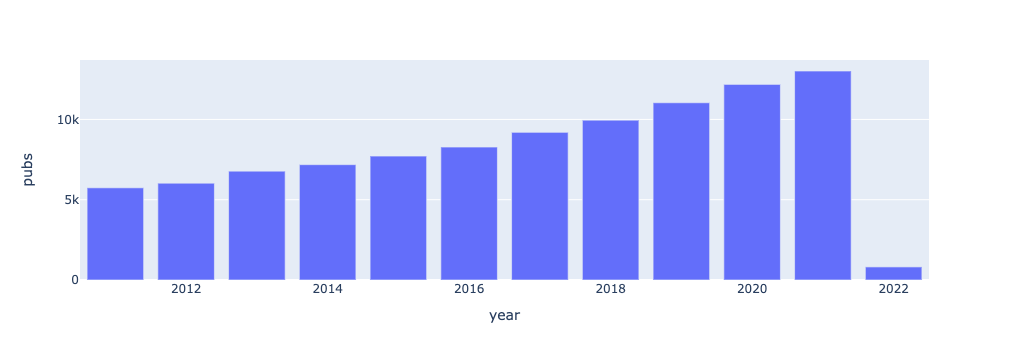

In [19]:
allpubs = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and year > 2010
        return year
    
    
    """).as_dataframe()

allpubs.columns = ['pubs', 'year']
px.bar(allpubs, x="year", y="pubs")

## 3. International publications

In [20]:
international = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) > 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

international.columns = ['international_count','year']
px.bar(international, x="year", y="international_count")

Returned Year: 12
Time: 0.64s


## 4. Domestic

In [21]:
domestic = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

domestic.columns = ['domestic_count', 'year']
px.bar(domestic, x="year", y="domestic_count")

Returned Year: 12
Time: 5.68s


## 5. Internal

In [22]:
internal = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_orgs) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

internal.columns = [ 'internal_count', 'year']
px.bar(internal, x="year", y="internal_count")

Returned Year: 12
Time: 0.56s


## 6. Joining up All metrics together 

In [23]:
jdf = allpubs.set_index('year'). \
      join(international.set_index('year')). \
      join(domestic.set_index('year')). \
      join(internal.set_index('year')) 

jdf

,pubs,international_count,domestic_count,internal_count
year,,,,
2021,13015,7212,5803,1585
2020,12183,6794,5389,1589
2019,11039,5948,5091,1584
2018,9954,5335,4619,1577
2017,9198,4669,4529,1541
2016,8281,4041,4240,1465
2015,7720,3697,4023,1450
2014,7184,3250,3934,1482
2013,6779,3000,3779,1480


In [24]:
px.bar(jdf, title="University of Melbourne: publications collaboration")

## 7. How does this compare to Australia?

Returned Year: 12
Time: 0.73s
Returned Year: 12
Time: 0.72s
Returned Year: 12
Time: 0.58s
Returned Year: 12
Time: 0.60s


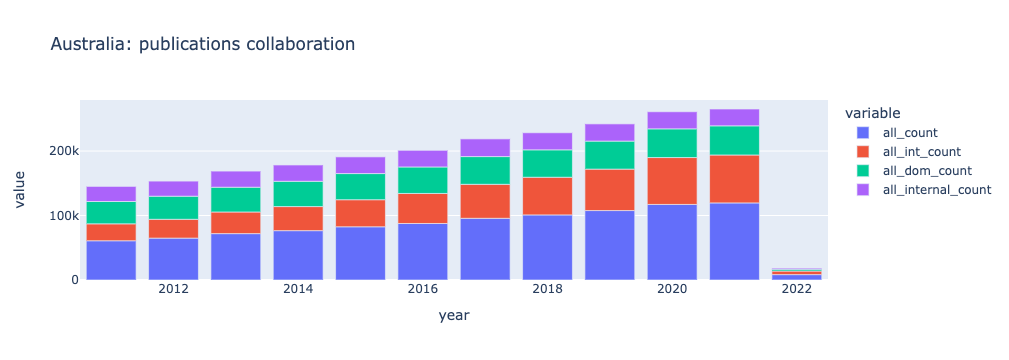

In [27]:
auallpubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
        return year
        
    """).as_dataframe()

auallpubs.columns = ['all_count', 'year', ]

auintpubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
            and count(research_org_countries) > 1
        return year
        
    """).as_dataframe()

auintpubs.columns = ['all_int_count', 'year', ]


audompubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
            and count(research_org_countries) = 1
        return year
        
    """).as_dataframe()

audompubs.columns = [ 'all_dom_count', 'year',]

auinternalpubs = dsl.query("""
    
        search publications 
            where 
            research_org_countries.name= "Australia"
            and count(research_orgs) = 1
            and type="article"
            and year > 2010
        return year
        
    """).as_dataframe()

auinternalpubs.columns = ['all_internal_count', 'year', ]

audf = auallpubs.set_index('year'). \
      join(auintpubs.set_index('year')). \
      join(audompubs.set_index('year')). \
      join(auinternalpubs.set_index('year')). \
      sort_values(by=['year'])

px.bar(audf, title="Australia: publications collaboration")

## 8. How does this compare to a different Institution  (University of Toronto)?

Returned Year: 12
Time: 0.56s
Returned Year: 12
Time: 0.59s
Returned Year: 12
Time: 0.61s
Returned Year: 12
Time: 0.56s


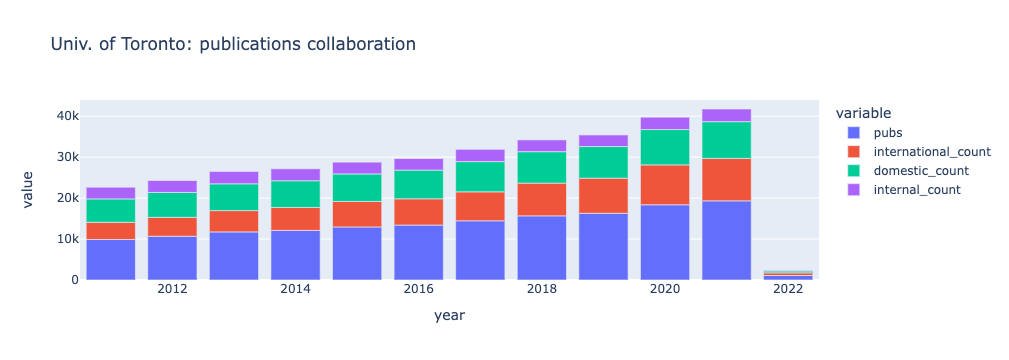

In [28]:
institution = "grid.17063.33"

allpubs = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and year > 2010
        return year
    
    
    """).as_dataframe()

allpubs.columns = ['pubs', 'year', ]



international = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) > 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

international.columns = ['international_count', 'year', ]


domestic = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

domestic.columns = ['domestic_count', 'year', ]

internal = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_orgs) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

internal.columns = ['internal_count', 'year', ]


jdf = allpubs.set_index('year'). \
      join(international.set_index('year')). \
      join(domestic.set_index('year')). \
      join(internal.set_index('year')) 

px.bar(jdf, title="Univ. of Toronto: publications collaboration")


---
## Want to learn more?

Check out the [Dimensions API Lab](https://api-lab.dimensions.ai/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 